In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('/content/boston_polynomial.csv')

df.head()

,price,LSTAT
0,24.0,4.98
1,21.6,9.14
2,34.7,4.03
3,33.4,2.94
4,36.2,5.33


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   506 non-null    float64
 1   LSTAT   506 non-null    float64
dtypes: float64(2)
memory usage: 8.0 KB


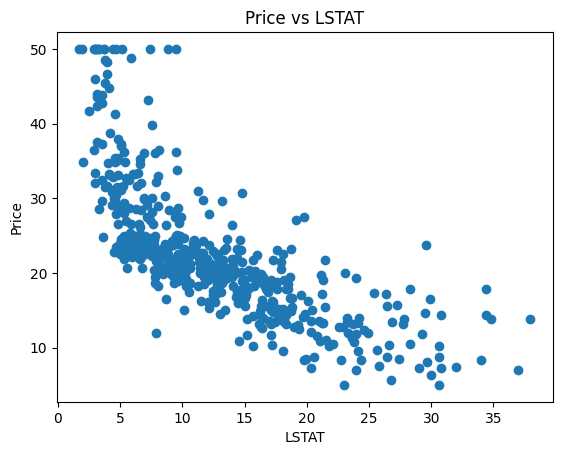

In [5]:
#1

x = np.array(df['LSTAT'])
y = np.array(df['price'])

plt.scatter(x, y)
plt.xlabel('LSTAT')
plt.ylabel('Price')
plt.title('Price vs LSTAT')
plt.show()


In [6]:
#2
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=5)
X_poly = poly_reg.fit_transform(x.reshape(-1, 1))


In [8]:
#3
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=1000)


In [9]:
#4

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_hat_test = lin_reg.predict(X_test)

predictions = pd.DataFrame({'y_test': y_test, 'y_hat_test': y_hat_test, 'resid': y_test - y_hat_test})

rmse_test = math.sqrt(mean_squared_error(y_test, y_hat_test))

print("RMSE_test:", rmse_test)


RMSE_test: 5.204155173295269


In [10]:
# prompt: Estimate the RMSE_test using K-Fold Cross Validation technique (K=5 only) and name it as RMSE_CV5. (10 points)

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np

kf = KFold(n_splits=5, shuffle=True, random_state=42)
rmse_list = []

for train_index, test_index in kf.split(X_poly):
  X_train, X_test = X_poly[train_index], X_poly[test_index]
  y_train, y_test = y[train_index], y[test_index]

  lin_reg = LinearRegression()
  lin_reg.fit(X_train, y_train)

  y_hat_test = lin_reg.predict(X_test)
  rmse_test = np.sqrt(mean_squared_error(y_test, y_hat_test))
  rmse_list.append(rmse_test)

RMSE_CV5 = np.mean(rmse_list)
print("RMSE_CV5:", RMSE_CV5)


RMSE_CV5: 5.2183623342312755


In [11]:
def my_polynomial_regression(poly_degree, X, y, test_size=0.2, rand_state=100):

    poly_features= PolynomialFeatures(degree=poly_degree)

    # transforms the existing features to higher degree features.
    X_poly = pd.DataFrame(poly_features.fit_transform(X.reshape(-1,1)))

    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=test_size, random_state=rand_state)

    # fit the transformed features to Linear Regression
    poly_model = LinearRegression()
    poly_model.fit(X_train, y_train)


    # predicting on training data-set
    y_train_predicted = poly_model.predict(X_train)

    # predicting on test data-set
    y_test_predicted = poly_model.predict(X_test)

   # evaluating the model on training dataset
    MSE_train = round(np.mean(np.square(y_train - y_train_predicted)),2)
    RMSE_train = round(np.sqrt(MSE_train),2)
    R2_train  = round(poly_model.score(X_train, y_train),3)


    # evaluating the model on test dataset
    MSE_test = round(np.mean(np.square(y_test - y_test_predicted)),2)
    RMSE_test = round(np.sqrt(MSE_test),2)
    R2_test  =  round(poly_model.score(X_test, y_test),3)



#     print("Traning model fit")
#     print("R2_train = {}".format(R2_train))

#     print("-------------------------------------------")
#     print("MSE_train = {}".format(MSE_train))
#     print("RMSE_train = {}".format(RMSE_train))

#     print("-------------------------------------------")
#     print("MSE_test = {}".format(MSE_test))
#     print("RMSE_test = {}".format(RMSE_test))

    return poly_degree, RMSE_train, RMSE_test, R2_train, R2_test



In [12]:
#6
results = []
for degree in range(1, 11):
  poly_degree, RMSE_train, RMSE_test, R2_train, R2_test = my_polynomial_regression(degree, x, y)
  results.append([poly_degree, RMSE_train, RMSE_test])

df_results = pd.DataFrame(results, columns=['Degree', 'RMSE_train', 'RMSE_test'])
print(df_results)


   Degree  RMSE_train  RMSE_test
0       1        6.10       6.63
1       2        5.36       6.05
2       3        5.23       5.90
3       4        5.11       5.78
4       5        4.99       5.89
5       6        4.97       5.97
6       7        4.97       5.97
7       8        4.96       5.95
8       9        4.96       5.92
9      10        4.96       5.93


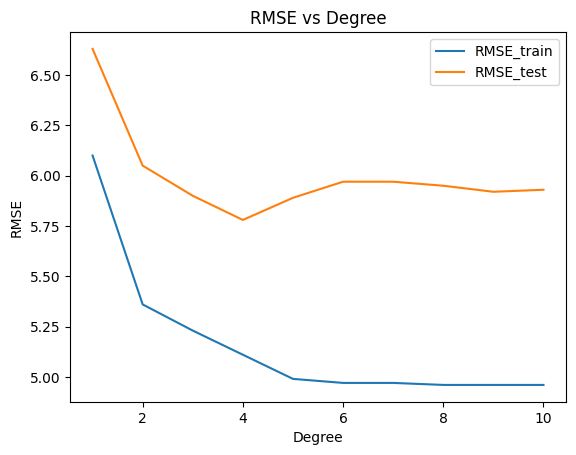

In [14]:
#7
plt.plot(df_results['Degree'], df_results['RMSE_train'], label='RMSE_train')
plt.plot(df_results['Degree'], df_results['RMSE_test'], label='RMSE_test')
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.title('RMSE vs Degree')
plt.legend()
plt.show()


#8
The most optimal value for the polynomial lies somewhere between 3-4. Between these values the RMSE is the lowest it cna be before we see an increase in the RMSE test. We could go lower, but the increase in the RMSE_test at those values indicates overfitting on the test data. So, between 3-4 we see the lowest value for RMSE_train and RMSE_test before we experience an increase in RMSE_test